# Bellabeat Case Study 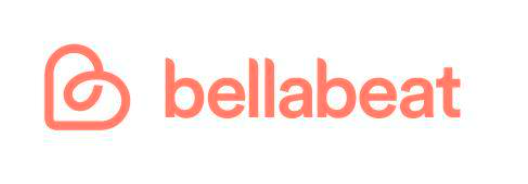

# Background
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

# Phase 1: Ask

The following questions will guide the analysis to be conducted:

1. Is customers' wellness positively impacted by Bellabeat's devices?
            
2. What is the impact of Bellabeat's devices on customer's wellness?

3. Are some aspects of customers' wellness more impacted than others?

4. Is there a correlation between different how different aspects of wellness are impacted?

<br>

The following welness aspects will be analyzed to answer the questions above:
* Step count
* Weigth loss and calories burned

<br>

In all,the data at hand will be used to identify trends in smart device usage to apply findings to marketing strategy to capture more consumer base and to potentially improve the devices examined. This strategy will be explained and its results will be showcased to the primary stakeholders,namely, Urška Sršen and Sando Mur, founders of Bellabeat.


# Phases 2-3: Prepare & Process

This data set is stored in the platform Kaggle. It contains personal fitness tracker from thirty fitbit users, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

The data will be analyzed using R (R Core Team, 2020) given the software's potential for data cleaning, analysis and vidualization. The first step taken using R will be to load the necessary packages and import the data.

In [ ]:
library(tidyverse)
library(lubridate)
library(chron)

### Import, explore and describe the data

In [ ]:

daily_activity <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
weight <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

In [ ]:
# Explore data columns
str(daily_activity)
str(daily_sleep)
str(weight)




### Daily activity
Contains detailed information about participants' use of th fitbit tracker, including records such as the date when the exercise took place, the steps and distance covered, as well as the type of activity carried out (very active, moderatem light and sedentary)in distance and minutes; finally, it also contains the calories burned. In in this dataset, all variables are numeric/integer except for the date.

### Daily sleep
Contains detailed information about participants' sleep pattern, including records such as the dates when they slept, the minutes they slept and the total time they slept (also in minutes). In in this dataset, all variables are numeric/integer except for the date.

### Weight
Contains detailed information about participants'weight fluctuations, including records such as the dates when they weighed themselves, their weight in kg and lb, as well as their their fat contens and BMI. In in this dataset, all variables are numeric/integer except for the date.

### Investigate the integrity of the data

In [ ]:
# Are there missing values in the data?
# There are missing values only in the weight dataset.
is.na(daily_activity)
is.na(weight)

In [ ]:
# Column with missing values is dropped using dplyr
weight <- weight %>% select(-Fat)

### Clean and sort the data

In [ ]:
# Split the date and time in the sleep and weight data frames.
weight <- separate(weight, Date, into=c("Date", "Time", "AM_PM"), sep=" ")

In [ ]:
# Date column is character vectors in all datasets
# It needs to be changed to the appropriate vector class

daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format =  "%m/%d/%Y")
weight$Date <- as.Date(weight$Date, format =  "%m/%d/%Y")

# Check the process worked
class(daily_activity$ActivityDate)
class(weight$Date)

In [ ]:

daily_activity <- daily_activity %>%
  mutate(Day = wday(as.Date(ActivityDate,"%m/%d/%Y"), label = TRUE, abbr = FALSE))

In [ ]:
# create a column with the days of the week
daily_activity <- daily_activity %>%
  mutate(Day = wday(as.Date(ActivityDate,"%m/%d/%Y"), label = TRUE, abbr = FALSE))

### Merge datasets

In [ ]:
# In order to prepare the data for analysis, the following merges are made
# All dataser share the Id column, specifiyinf the participant id

activity_weight <- left_join(daily_activity, weight)

# Check the process worked
str(activity_weight)

# Phases 4-5: Analyze and Share

## How much are participants exercising?
The first step in analyzing the data at hand should be to understand the basics of participants' habits. For this purpose, the summary() function is used to extract the basic descriptive statistics on:
* Total step-count per day (in steps and miles).
* Total calories burned per day.
* Total very active, fairly active, lightly active and sedentary minutes per day.

In the results shown below, it can be observed that:
* Participants walked an average of 7630 steps (5.49 miles) which is well below the recommended 10,000 steps ([Center for Disease Control and prevention](https://www.cdc.gov/physicalactivity/basics/adults/))
* The total of calories burned per day was 2304.
* TRhe average of sedentary minutes was the highest (991) while the average of fairly active monutes was the lowest (13).

In [ ]:
summary(daily_activity$TotalSteps)
summary(daily_activity$TotalDistance)
summary(daily_activity$Calories)
summary(daily_activity$VeryActiveMinutes)
summary(daily_activity$FairlyActiveMinutes)
summary(daily_activity$LightlyActiveMinutes)
summary(daily_activity$SedentaryMinutes)

In order to better understand these data, the percentage of time participants exercised each month was calculated. As can be seen, participants only exercised 3/.10% in April and 3.64% in May.

In [ ]:
daily_activity <- daily_activity %>% group_by(ActivityDate) %>%
        mutate(percentage = TotalSteps/sum(TotalSteps)*100)

daily_activity$Month <- months(daily_activity$ActivityDate)


daily_activity %>% 
            group_by(Month) %>%
            summarise(mean(percentage))



## 1. Step-count & Weight loss

In this phase of the analysis process, the first step will be to analyze the data to gain insights into the relationship between daily activity (i.e., step-count) and weight loss in participants. In the bar graph below, it can be observed that Saturday is the day with the highest step-count, followed by Wednesday, Tuesday and Monday. Interestingly, Sunday is the day with the lowes step-count. Thus,the data reveals that participants tend to exercise more towards the beginning and the end of the week.

In [ ]:
ggplot(activity_weight, aes(y=TotalSteps,x=Day, fill = Day))+          
  stat_summary(fun.y = mean,geom="bar",position = "dodge", width = .8 )+
 scale_y_continuous(breaks=seq(0,20000,by=1000)) +
ggtitle("Total steps per day of the week")+
theme(plot.title = element_text(hjust = 0.5))

Next step is to examine trends in participants' weight. The line graph below shows that although there is a lot of fluctuation, it can be observed that there is an overall trend towards weight loss.

In [ ]:
ggplot(weight, aes(x=Date, y=WeightPounds)) +
  geom_line( color="steelblue") + 
  geom_point() +
  stat_smooth(
  color = "#FC4E07", fill = "#FC4E07",
  method = "lm") +
  ggtitle("Weight trend over time") +
  theme(plot.title = element_text(hjust = 0.5))



However, when examining the correlation (i.e., relationship) between step-count and weight loss, it was found that it was a weak, but significant, positive correlation, meaning that the more participants walked, the more weight they seem to gain. Further steps need to be taken to look into this seemingly contradictory result.

In [ ]:
cor.test(activity_weight$TotalSteps, activity_weight$WeightPounds)

The line graph below depicts participants' step-count over time. It can be observed that, as time progresses, participants have an overall trend to have a lower step-count, in other words, they exercise less.

In [ ]:
ggplot(activity_weight, aes(x=ActivityDate, y=TotalSteps)) +
  geom_line( color="steelblue") + 
  geom_point() +
  stat_smooth(
  color = "#FC4E07", fill = "#FC4E07",
  method = "lm") +
  ggtitle("Step trend over time") +
  theme(plot.title = element_text(hjust = 0.5))

## 2. Calories and Intensity

The next step in this analysis is to examine the relationship between caloric expenditure and intensity of the exercised carrie out. The scatteplot below shows that the more active participants are the more calories they burn, as would be expected.  

In [ ]:

ggplot(data=daily_activity, aes(VeryActiveMinutes, Calories)) + 
geom_point() +
geom_smooth(method = 'lm', se = TRUE) + 
labs(title='Intense Minutes vs. Calories', x = 'Total Very Active Minutes', y = 'Calories') +
scale_y_continuous(labels = scales::comma) + 
scale_x_continuous(labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5))

In fact, there is a strong, anf significant, positive correlation between calories and very activity intensity:

In [ ]:
cor.test(daily_activity$Calories, daily_activity$VeryActiveMinutes)

However, given that we know there is an overall trend for participants to decrease their exercise habits the longer they have a fitibit tracker, one would also expect an overall decrease in calorie expenditure overtime, as shown in the line graph below:

In [ ]:
ggplot(activity_weight, aes(x=ActivityDate, y=Calories)) +
  geom_line( color="steelblue") + 
  geom_point() +
  stat_smooth(
  color = "#FC4E07", fill = "#FC4E07",
  method = "lm") +
  ggtitle("Step trend over time") +
  theme(plot.title = element_text(hjust = 0.5))

This might be due to two facts: first, we can observe that most of participants' exercise can be considered 
"light."

In [ ]:
mean_activity_min <- c(192,13,21)
activity_intensity <- c("Lightly","Fairly", "Very Active")
intensity_min <- data.frame(mean_activity_min, activity_intensity)

ggplot(data = intensity_min) + 
geom_col(aes(x = activity_intensity, y = mean_activity_min, fill= activity_intensity)) +
labs(title = 'Average Minutes by Intensity', x = 'Activity Intensity', y = 'Average Activity Minutes') +
theme(plot.title = element_text(hjust = 0.5))

Second, there is a sharp decrease in very active exercise over time.

In [ ]:
ggplot(activity_weight, aes(x=ActivityDate, y=VeryActiveMinutes)) +
  geom_line( color="steelblue") + 
  geom_point() +
  stat_smooth(
  color = "#FC4E07", fill = "#FC4E07",
  method = "lm") +
  ggtitle("Step trend over time") +
  theme(plot.title = element_text(hjust = 0.5))

The key findings of this analysis are:

**1. Positive findings**
* Participants tend to exercise more towsards the beginning and end of the week
* The more participants exercise the more calories they burn
* Pariticpants lose weight in the long run

**2. Negative findings**
* Participants tend to under-exercise per month on average
* Participants tend to progressively exercise less an burn less calories


In summary, it seems that participants exercise less and therefore burn less calories the longer they have one of Bellabeat's products. While participants do observe an overall weight loss in the long run, their weight-loss journey is negatively impacted by a drecrease in exercise over time, as they do not lose weight or burn calories in a consistent manner.

# Phase 6: Act

Based on the analysis carried out, it seems clear that Bellabeat needs to find ways to increase their clients' motivation to exercise. These results would be extremely useful for the creative team to work in synch with engineers to create features in Bellabeat's devices that engaga clients more and, thus, boost their motivation adn willingness to exercise. 